In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data= pd.read_csv('./final.csv',sep = ',')
data["class"][0]
len(data)

15394

In [2]:
class_str=['(0 2)f', '(4 6)f', '(8 12)f', '(15 20)f', '(25 32)f', '(38 43)f', '(48 53)f', '(60 100)f',
           '(0 2)m', '(4 6)m', '(8 12)m', '(15 20)m', '(25 32)m', '(38 43)m', '(48 53)m', '(60 100)m']
class_str.index(data["class"][0])

4

In [3]:
folder_root="C:/Users/gram/Desktop/face_img/"
train= folder_root + '*.jpg'#이미지파일 불러오기

from PIL import Image
import numpy as np
import glob
train_path=glob.glob(train)
train_path[0].index('1'), train_path[0]

(31, 'C:/Users/gram/Desktop/face_img\\1.10152675314_02d5855224_o.jpg')

In [4]:
def parse_folder(folder, n):
    train_path=glob.glob(folder)
    
    list_x=[]
    list_y=[]
    
    for i in range(n):
        img_path= train_path[i]
        img= Image.open(img_path)
        img=img.resize((256,256))
        
        img_name=img_path[31:]
        j=0
        for j in range(len(data)):
            if img_name==data.img_name[j]:
                #print(img_name)
                
                arr=np.array(img)
                list_x.append(arr)
                
                label= data['class'][j]
                label_index=class_str.index(label)
                list_y.append(label_index)
                #print(label)
                
            else: continue
        
    return np.array(list_x), np.array(list_y)


In [5]:
n=3000 #19365로 돌려야하는데 자꾸 멈춤,, 
x, y= parse_folder(train, n)
x.shape, y.shape

((2072, 256, 256, 3), (2072,))

In [6]:
import sklearn
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val =train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)
x_train_all.shape, x_train.shape, x_val.shape, y_train_all.shape, y_train.shape, y_val.shape

((1657, 256, 256, 3),
 (1325, 256, 256, 3),
 (332, 256, 256, 3),
 (1657,),
 (1325,),
 (332,))

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import PIL
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

y_train_encoded =tf.keras.utils.to_categorical(y_train)
y_val_encoded= tf.keras.utils.to_categorical(y_val)

x_train= x_train.reshape(-1,256,256,3)
x_val=x_val.reshape(-1,256,256,3)

x_train= x_train/255
x_val=x_val/255

x_train.shape, x_val.shape

((1325, 256, 256, 3), (332, 256, 256, 3))

In [8]:
conv2= tf.keras.Sequential()
#합성곱층
conv2.add(Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(256,256,3)))#합성곱층 쌓기
conv2.add(MaxPooling2D((2,2)))#폴링층 
conv2.add(Conv2D(64,(3,3), activation='relu'))
conv2.add(MaxPooling2D((2,2)))
conv2.add(Conv2D(64,(3,3), activation='relu'))
#dense층
conv2.add(Flatten())
conv2.add(Dropout(0.2))#드롭아웃
conv2.add(Dense(64,activation='relu'))
conv2.add(Dense(16,activation='softmax'))#16개 출력

print(conv2.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 238144)            0         
_________________________________________________________________
dropout (Dropout)            (None, 238144)            0

In [9]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1= conv2.fit(x_train, y_train_encoded, epochs=100, validation_data=(x_val,y_val_encoded))

Epoch 1/100
42/42 [==============================] - 108s 3s/step - loss: 3.1545 - accuracy: 0.2408 - val_loss: 2.5641 - val_accuracy: 0.2741
Epoch 2/100
42/42 [==============================] - 108s 3s/step - loss: 2.3599 - accuracy: 0.2981 - val_loss: 2.4708 - val_accuracy: 0.3133
Epoch 3/100
42/42 [==============================] - 108s 3s/step - loss: 1.9593 - accuracy: 0.3977 - val_loss: 2.2549 - val_accuracy: 0.3614
Epoch 4/100
42/42 [==============================] - 116s 3s/step - loss: 1.2439 - accuracy: 0.6287 - val_loss: 2.6135 - val_accuracy: 0.2982
Epoch 5/100
42/42 [==============================] - 125s 3s/step - loss: 0.5640 - accuracy: 0.8355 - val_loss: 3.7231 - val_accuracy: 0.3524
Epoch 6/100
42/42 [==============================] - 123s 3s/step - loss: 0.3472 - accuracy: 0.9177 - val_loss: 3.6735 - val_accuracy: 0.3193
Epoch 7/100
42/42 [==============================] - 131s 3s/step - loss: 0.2516 - accuracy: 0.9479 - val_loss: 4.1218 - val_accuracy: 0.3163
Epoch 

42/42 [==============================] - 113s 3s/step - loss: 0.0353 - accuracy: 0.9909 - val_loss: 4.0639 - val_accuracy: 0.2892
Epoch 59/100
42/42 [==============================] - 112s 3s/step - loss: 0.0273 - accuracy: 0.9894 - val_loss: 5.0708 - val_accuracy: 0.3494
Epoch 60/100
42/42 [==============================] - 114s 3s/step - loss: 0.0218 - accuracy: 0.9902 - val_loss: 4.1754 - val_accuracy: 0.3042
Epoch 61/100
42/42 [==============================] - 112s 3s/step - loss: 0.0295 - accuracy: 0.9902 - val_loss: 5.1265 - val_accuracy: 0.3042
Epoch 62/100
42/42 [==============================] - 111s 3s/step - loss: 0.0231 - accuracy: 0.9887 - val_loss: 4.9266 - val_accuracy: 0.3283
Epoch 63/100
42/42 [==============================] - 111s 3s/step - loss: 0.0216 - accuracy: 0.9902 - val_loss: 4.5719 - val_accuracy: 0.3133
Epoch 64/100
42/42 [==============================] - 111s 3s/step - loss: 0.0163 - accuracy: 0.9902 - val_loss: 4.8289 - val_accuracy: 0.2922
Epoch 65/100

In [11]:
from keras.models import load_model
conv2.save('model.h5')

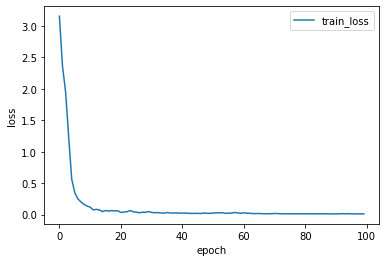

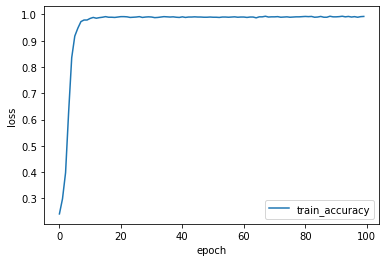

In [59]:
#손실그래프
plt.plot(history1.history['loss'])
#plt.plot(history1.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()
#정확도 그래프
plt.plot(history1.history['accuracy'])
#plt.plot(history1.history['val_accuracy'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [13]:
loss, accuracy =conv2.evaluate(x_train, y_train_encoded, verbose=2)
print(accuracy)

42/42 - 29s - loss: 0.0108 - accuracy: 0.9932
0.993207573890686


In [14]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(conv2, show_shapes=True).create(prog='dot', format='svg'))

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


AttributeError: 'NoneType' object has no attribute 'create'

In [15]:
from keras.models import load_model
model = load_model('model.h5')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 238144)            0         
_________________________________________________________________
dropout (Dropout)            (None, 238144)            0

In [43]:
from tensorflow import keras
model = keras.models.load_model('model.h5', compile=False) #pb생성

export_path = './Model'
model.save(export_path, save_format='tf')

INFO:tensorflow:Assets written to: ./Model\assets


In [56]:
v = tf.Variable(0, name='model.h5')
sess = tf.compat.v1.Session()
tf.io.write_graph(sess.graph_def, '/.', 'train.pbtxt', as_text=True)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 90: invalid start byte

In [58]:
from tensorflow.python.framework import graph_io

tf.io.write_graph(model, './', 'graph.pbtxt')

AttributeError: 'Sequential' object has no attribute 'DESCRIPTOR'

In [48]:
from tensorflow.python.framework import graph_io

frozen = tf.graph_util.convert_variables_to_constants(sess, sess.graph_def, ["output_node_name"])
graph_io.write_graph(frozen, './', 'graph.pb', as_text=False)

AttributeError: module 'tensorflow._api.v2.graph_util' has no attribute 'convert_variables_to_constants'